# SHORT TEXT TOPIC MODELLING!

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_csv('data/preprocessed_tweets_ar.csv',  low_memory=False) 
df = pd.DataFrame(data['content'])
df['date'] = pd.to_datetime(data['date'])

In [2]:
# Set start of binning to lowest date
start_datetime = df['date'].min()

# Set the 'timestamp' column as the index
df.set_index('date', inplace=True)

# Create bins based on 2 hour steps
bins = pd.date_range(start=start_datetime, periods=(len(df) // 2) + 1, freq='2H')
dfs = [group for _, group in df.groupby(pd.cut(df.index, bins))]
dfs = dfs[:50] # Cutoff at 50 bins, data too sparse after that 

In [3]:
# Get list of words per bin
words_per_bin = []

for bin in dfs:
    string = ''.join(np.array(bin['content'].astype(str)))
    list = string.split(' ')
    list = [word for word in list if word != '']
    words_per_bin.append(list)

print(words_per_bin)

[['haluklevent', 'babalatv', 'oguzhanugur', 'alniopulesitivt', 'depremyerbildirimi', 'afad', 'turkey', 'helpturkey', 'afad', 'ahbap', 'person', 'ashamed', 'food', 'bed', 'sleep', 'warm', 'home', 'turkey', 'depremsondakika', 'pensiveface', 'reminderribbon', 'deprem', 'deprem', 'hatayiskenderun', 'depremsondakika', 'turkey', 'acildeprem', 'hatayiskenderun', 'turkey', 'please', 'share', 'urgent', 'hatayiskenderun', 'turkey', 'rahatdegiliz', 'oguzhanugur', 'babalatv', 'haluklevent', 'afadbaskanlik', 'barisatay', 'syria', 'thinkingface', 'rescue', 'work', 'friend', 'stopped', 'please', 'support', 'ayemyasin', 'babalatv', 'ahbap', 'ahbap', 'babalatv', 'oguzhanugur', 'haluklevent', 'turkey', 'depremsondakika', 'marasayetisemisin', 'couldnt', 'save', 'mehmet', 'sorry', 'young', 'son', 'condolence', 'family', 'friend', 'said', 'mehmetikurtarin', 'day', 'wish', 'lord', 'give', 'life', 'foldedhands', 'hatayiskenderun', 'turkey', 'hatay', 'dümdüzz', 'mean', 'crane', 'afad', 'team', 'dont', 'come',

In [4]:
words_np = np.array(words_per_bin)
unique_words = np.unique(words_np)

my_dict = {}

# Create occurence dictionary entry for each word
for i, words in enumerate(words_per_bin):
    counts = Counter(words)
    result = counts.most_common()
    top_cts = result[:50]

    # For each counter elem (word, occurence amount)
    for elem in top_cts:
        key = elem[0]
        num = elem[1]
        if key in my_dict:
            my_dict[key][0] += num # Add occurence amount
            my_dict[key][1] += 1 # How many bins the word occurs in
        else:
            # Key doesn't exist, create a new entry with the values
            my_dict[key] = [num, 1]


C:\Users\frans\AppData\Local\Temp\ipykernel_8972\2069277255.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  words_np = np.array(words_per_bin)


In [19]:
sorted_dict = dict(sorted(my_dict.items(), key=lambda x: x[1][1], reverse=True))
print(sorted_dict)

treshold = 12  # Maximum amount of bins a word can occur in
filtered_words = [item[0] for item in sorted_dict.items() if item[1][1] > treshold] # Fetch words that occur in more than treshold bins
print(filtered_words)

{'turkey': [39553, 50], 'earthquake': [36954, 50], 'deprem': [6964, 50], 'people': [5303, 50], 'turkeyearthquake': [3839, 50], 'syria': [12868, 50], 'help': [4904, 49], 'hatay': [4948, 48], 'rubble': [2431, 48], 'turkiye': [2376, 47], 'turkeysyriaearthquake': [5280, 46], 'rescue': [2048, 46], 'team': [2004, 45], 'day': [1858, 44], 'aid': [2175, 44], 'hour': [1605, 41], 'victim': [1748, 41], 'life': [1467, 40], 'god': [1958, 39], 'turkeyquake': [3304, 36], 'km': [1173, 36], 'earthquakeinturkey': [2285, 35], 'country': [1636, 35], 'turkish': [1169, 35], 'one': [1421, 33], 'afad': [2158, 32], 'foldedhands': [1846, 32], 'syriaearthquake': [997, 32], 'death': [1320, 31], 'u': [1403, 30], 'time': [955, 29], 'depremsondakika': [8615, 27], 'ahbap': [2340, 27], 'redheart': [990, 26], 'please': [3046, 25], 'news': [788, 25], 'türkiye': [645, 25], 'rescued': [523, 24], 'helpturkey': [3543, 23], 'need': [1767, 22], 'turquia': [991, 22], 'child': [716, 22], 'utc': [484, 22], 'let': [2176, 21], 'ear

In [23]:
# Obtain the per-bin counts by using
# the Counter class on each list of words
# for a given bin. Also filter out words that
# occur in too many bins.
per_bin_cts = []

# Loop through each bin, filter and then display occurence counts
for i, word_bin in enumerate(words_per_bin):
    removed = np.unique(np.array([x for x in word_bin if x in filtered_words])) # Debug only, get amount of removed words
    word_bin = [x for x in word_bin if x not in filtered_words] # Filter out words that occur in too many bins
    #print("Filtered: {} words".format(len(removed)))

    if(len(word_bin) == 0): # Filter empty bins
        continue

    # Count occurences of words in bin
    # sort by most common, append that to per_bin_cts
    counts = Counter(word_bin)
    top_results = counts.most_common()
    top_counts = top_results[:25]
    per_bin_cts.append(top_counts)


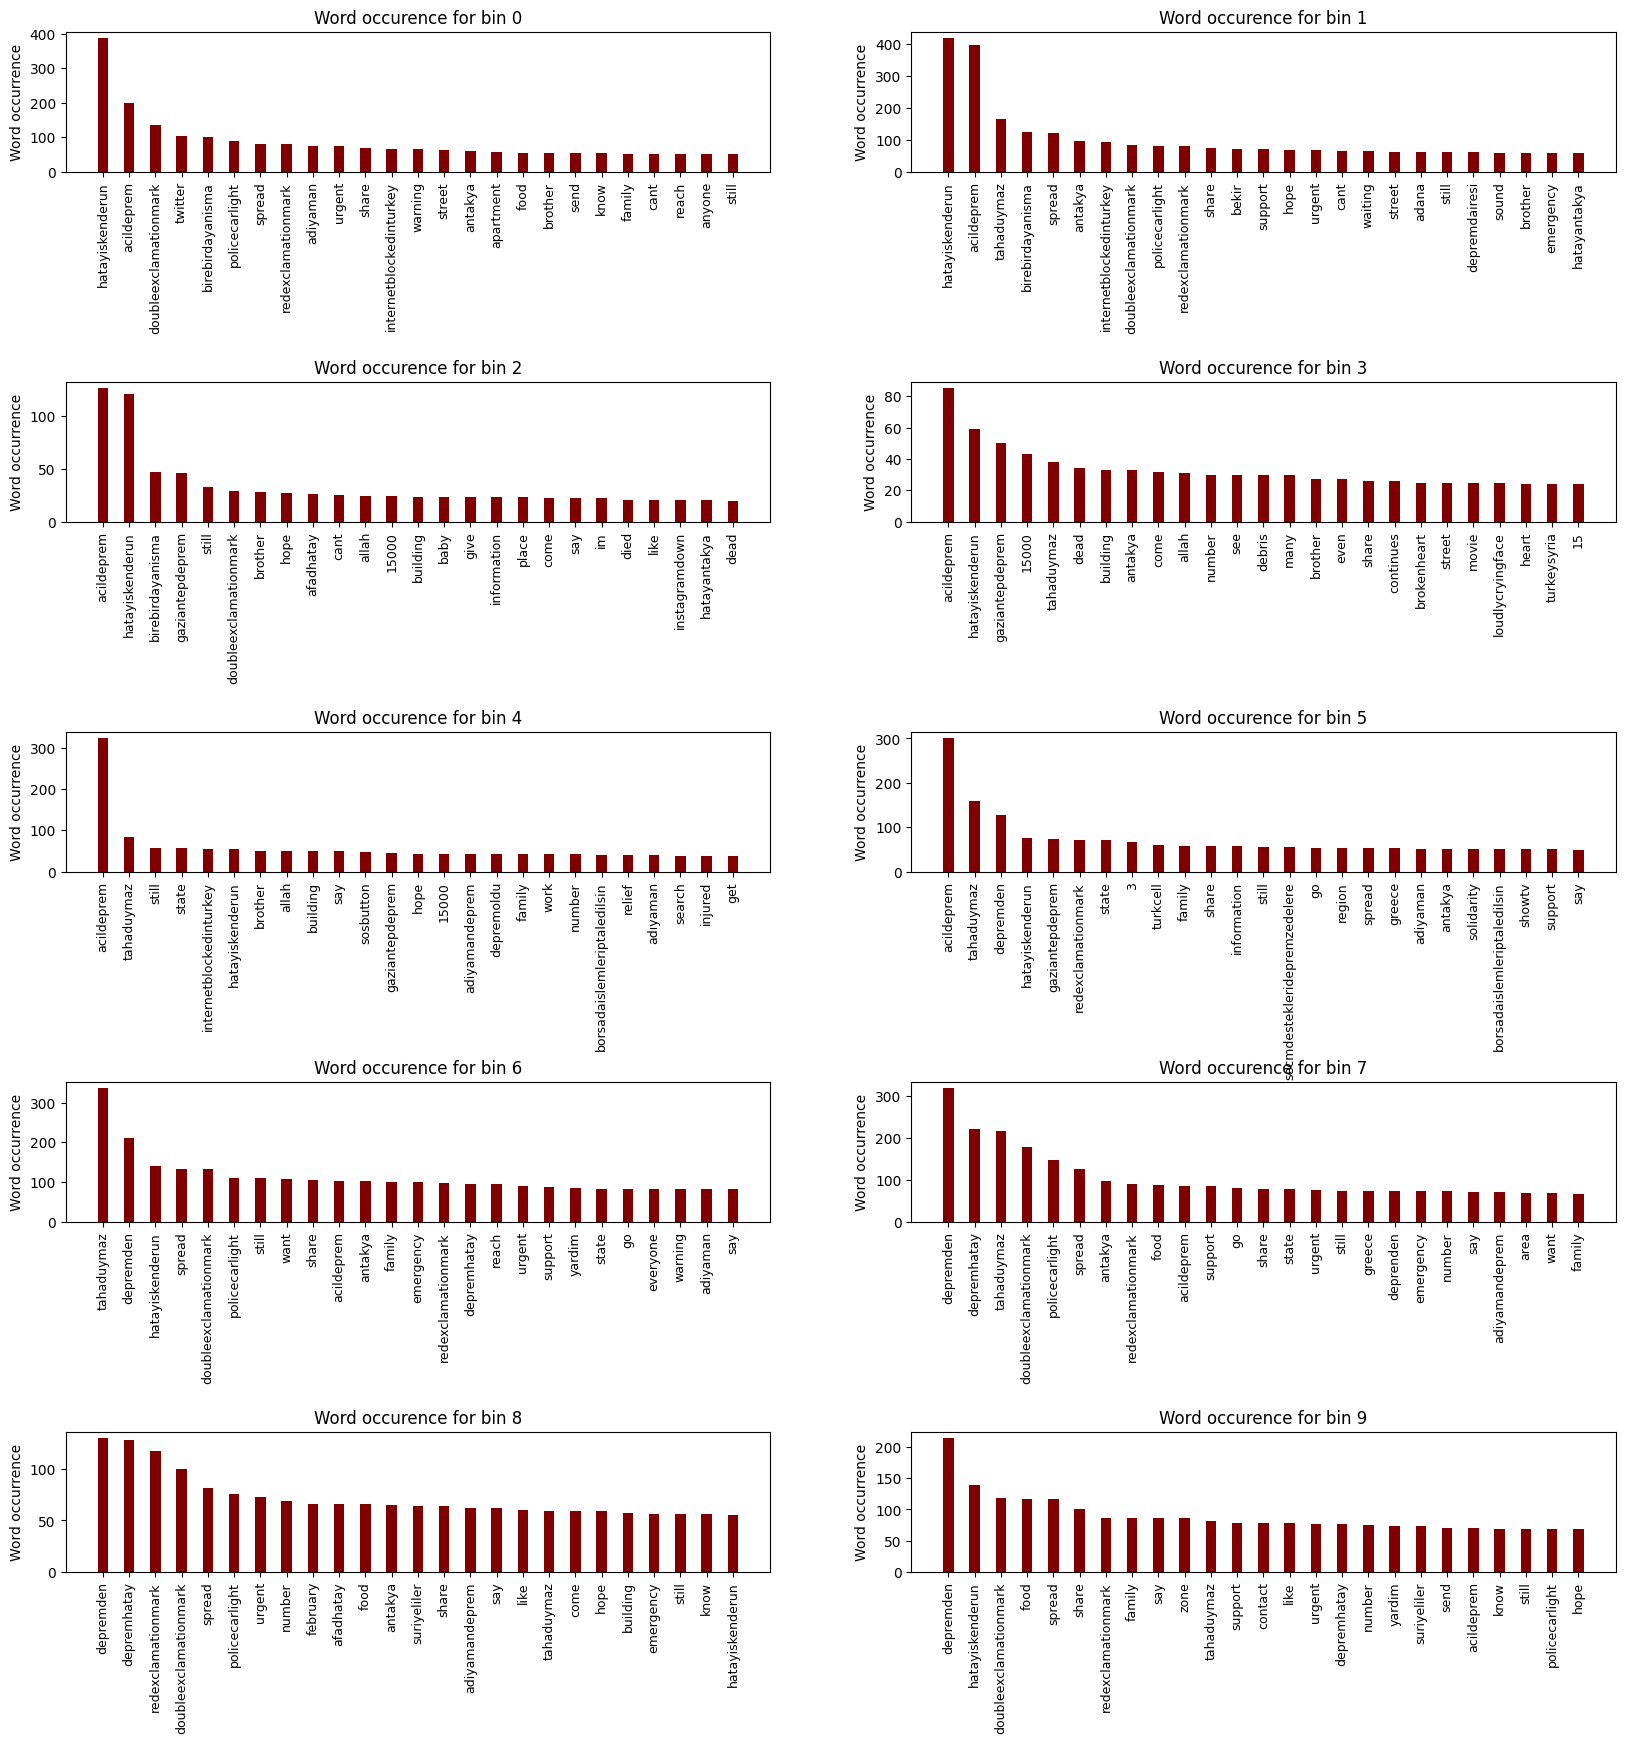

In [18]:
import matplotlib.pyplot as plt

def plot_bins(start=0, end=10):
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

    for num, ax in zip(range(start, end), axs.flatten()):
        words = [item[0] for item in per_bin_cts[num]]
        values = [item[1] for item in per_bin_cts[num]]

        # creating the bar plot
        ax.bar(words, values, color='maroon', width=0.4)

        ax.set_xticks(words)
        ax.tick_params(axis='x', labelrotation=90, labelsize=9)
        ax.set_ylabel("Word occurrence")
        ax.set_title("Word occurence for bin {}".format(num))

    plt.subplots_adjust(hspace=1.5)  # Increase the vertical spacing between subplots
    plt.show()

plot_bins()

In [82]:
# TODO:
# Filter out common words that occur in each bin
# try n-grams (bigrams, trigrams, etc.)
# https://github.com/OpenNMT/OpenNMT-py 
